In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import scipy.stats as sts
import pandas as pd
import sympy as sp

In [32]:
datos = 
x_i = datos['X'].values
y_i = datos['Y'].values
datos.head()

,X,Y
0,0.02,0.0996
1,0.04,0.1854
2,0.06,0.2418
3,0.08,0.2692
4,0.10,0.3168


## $E[Y] = \frac{\beta_0 X}{\beta_1 + X} $

In [9]:
##################
def funcion_num(x, bets): # DEFINIR LA FUNCION PROPUESTA
    return 50*np.exp((bets[0] - bets[1] - bets[2]**2 / 2 )*x)


# DEFINES MODELO EN SYMPY
x, r, d, s = sp.symbols('x, r, d, s')
funcion = 50*sp.E**((r-d-s**2 / 2)*x)
betas = [r, d, s]
# n = len(x_i)
# m = len(betas)
funcion
##################

50*exp(x*(-d + r - s**2/2))

In [69]:
##################
def funcion_num(x, bets): # DEFINIR LA FUNCION PROPUESTA
    return bets[0]*x / (bets[1] + x)


# DEFINES MODELO EN SYMPY
x, b1, b2 = sp.symbols('x, b1, b2')
funcion = b1*x / (b2 + x)
betas = [b1, b2]
n = len(x_i)
m = len(betas)
funcion
##################

b1*x/(b2 + x)

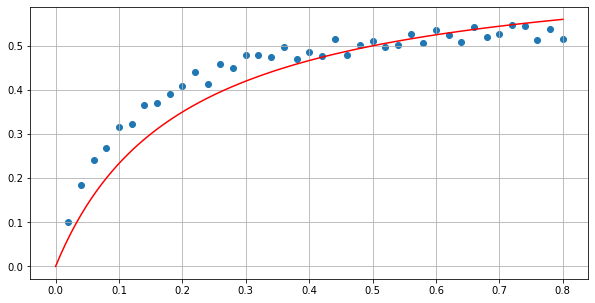

In [85]:
plt.figure(figsize=(10, 5))
valores = np.linspace(0, 0.8, 100) ################## GENERAR VALORES 
plt.scatter(x_i, y_i)
betas0 = [0.7, .2] ##################
plt.plot(valores, funcion_num(valores,betas0), color='red')################## PROBAR DISTINTOS BETAS
plt.grid()

In [68]:
derivadas = []
for i in range(len(betas)):
    derivadas.append(sp.diff(funcion, betas[i]))
derivadas

[x/(b2 + x), -b1*x/(b2 + x)**2]

In [86]:
Z = np.zeros([len(x_i), len(betas)])
k = 0
distancia = 10
while abs(distancia) > 0.00001:
    fi = funcion_num(x_i, betas0)
    for i in range(len(x_i)):
        for j in range(len(betas)):
            Z[i, j] = derivadas[j].subs([(x, x_i[i]), (b1, betas0[0]), (b2, betas0[1])]).evalf() #######################

    betas1 =  betas0 + (np.linalg.inv(Z.T@Z))@(Z.T)@(y_i - fi)
#     distancia = betas1[0] - betas0[0]

    # distancia entre las betas nuevas y las betas antiguas
    for k in range(len(betas0)):
        valsss = []
        valsss.append((betas1[k] - betas0[k])**2)
        
    distancia = np.sqrt(sum(valsss))
    betas0 = betas1

betas1

array([0.59894968, 0.09191336])

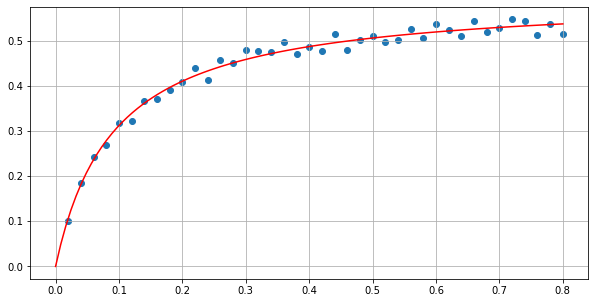

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(x_i, y_i)
plt.plot(valores, funcion_num(valores, betas1), color='red')
plt.grid()

In [25]:
# def mod(x, bets):
#     return bets[0] * np.sin(bets[1] + bets[2]*x)

## $\text{Análisis residual}$

In [72]:
y_ajustadas = funcion_num(x_i, betas1)
ei = y_i - y_ajustadas
SSres = sum(ei**2)
MSres = (1/(n-m)) * SSres
MSres 

0.00017016733723927731

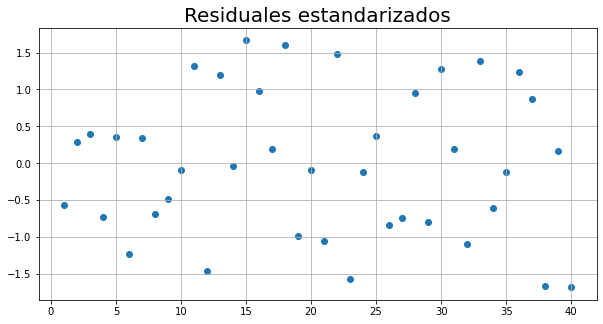

In [73]:
ei_estandarizados = ei/np.sqrt(MSres)

graf = []
for i in range(1, len(ei)+1):
    graf.append(i)
grafs = np.array(graf)

plt.figure(figsize=(10, 5))
plt.scatter(grafs, ei_estandarizados)
plt.title('Residuales estandarizados', fontsize=20)
plt.grid()

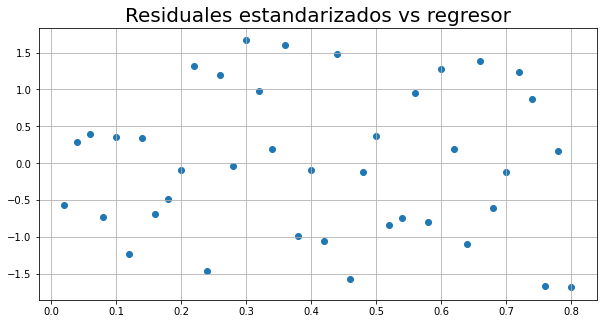

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(x_i, ei_estandarizados)
plt.title('Residuales estandarizados vs regresor', fontsize=20)
plt.grid()